##### CAUTION: Completing and submitting the assignment constitutes your commitment to complete the assignment independently and not to plagiarize or provide others with the opportunity to plagiarize.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "郭子涵"
COLLABORATORS = "0921201"

---

#### Problem 1: 线性检索与二分检索 (40 points)
 (1) 随机生成含有若干个非负整数元素的数组， 任意设置一个值，线性检索其是否在数组中。有就输出其位置，没有就输出-1; 
 
 (2) 假设数组有序，用二分检索算法完成该问题；
 
 (3) 将问题规模（即元素个数）由100分别改为300/500/1000/3000/5000/10000/30000/50000，记录两种算法下在数组有序情况下各自的运行时间，并画出两种算法运行时间随问题规模增长的曲线。

首先设计一个生成随机整数元素数组的函数。 (5 points)

In [1]:
import random
def generate_random_list(elements_number,upper_bound): #elements_number:元素个数; upper_bound:上界
    random_list = []
    # YOUR CODE HERE
    for i in range(elements_number):
        random_list.append(random.randint(0,upper_bound))
    return random_list

In [2]:
# 测试 generate_random_list 函数
my_list = generate_random_list(3,10)
assert len(my_list) == 3 
assert min(my_list) >=0 and max(my_list) <= 10


设计线性检索函数。 (10 points)

In [3]:
def linear_search(A,x): # A:整数数组; x:待查找的整数
    j=-1
    
    # YOUR CODE HERE
    for i in range(len(A)):
        if A[i] == x:
            j=i
            break
    
    return j

In [4]:
# 测试 linearSearch 函数
A = [4,3,1,2,6]
assert linear_search(A,2) == 3


假设数组已经有序，设计二分检索函数。(10 points)

In [5]:
def binary_search(A,x): # A:整数数组; x:待查找的整数
    j=-1
    
    # YOUR CODE HERE
    low = 0
    high = len(A)-1
    while low <= high:
        mid = (low+high)//2
        if A[mid] == x:
            j = mid
            break
        elif A[mid] < x:
            low = mid+1
        else:
            high = mid-1

    return j


In [6]:
# 测试 binary_search 函数
A = [1,2,3,4,6]
assert binary_search(A,2) == 1


在不同的问题规模下对比两者效率并绘制图形。(15 points)

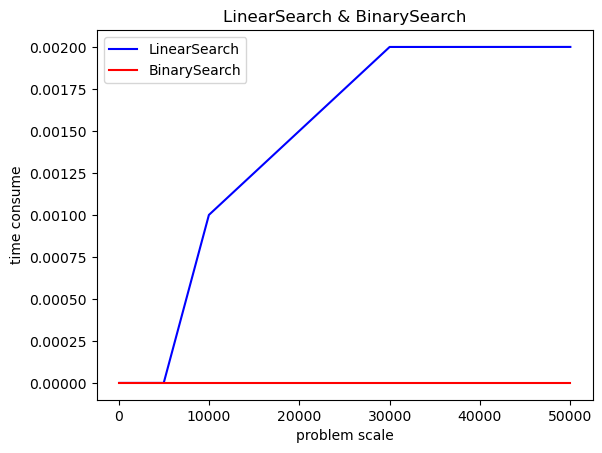

In [7]:
import time #用以记录时间
import matplotlib.pyplot as plt #用以绘图

scales=[100,300,500,1000,3000,5000,10000,30000,50000] #不同的问题规模
time_consumes_of_linear_search = [] #线性检索算法在不同问题规模下的时间耗费
time_consumes_of_binary_search = [] #二分检索算法在不同问题规模下的时间耗费
upper_bound = 50000 #元素上界
x = random.randint(0,50000) #待查找整数
A = [] #注意：生成的随机数组变量名必须为 A

# YOUR CODE HERE
for i in range(len(scales)):
    A = generate_random_list(scales[i],upper_bound)
    
    start = time.time()
    linear_search(A,x)
    end = time.time()
    time_consumes_of_linear_search.append(end-start)
    
    start = time.time()
    binary_search(A,x)
    end = time.time()
    time_consumes_of_binary_search.append(end-start)

plt.plot(scales, time_consumes_of_linear_search, 'b', label='LinearSearch')
plt.plot(scales, time_consumes_of_binary_search, 'r', label='BinarySearch')
plt.title('LinearSearch & BinarySearch')
plt.xlabel('problem scale')
plt.ylabel('time consume')
plt.legend()
plt.show()


可获得类似于下面的图像。
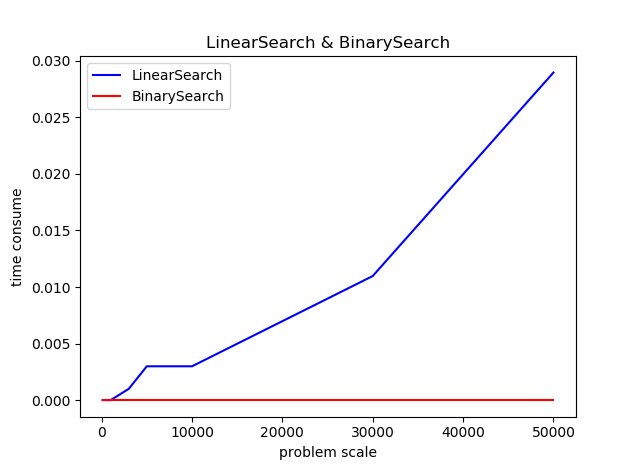

In [10]:
# 测试以上代码完成情况
assert True != False #该行仅为标记，无需理会


## Problem 2: 插入排序、改进版插入排序和合并排序 (60 points)
（1）	随机生成含有若干个非负整数元素的数组，设计插入排序算法对其排序；

（2）	对插入排序算法的“查找无序区首元素在有序区恰当位置”部分进行改进，以二分检索取代之前的线性检索，形成改进版插入排序；

（3）	实现合并排序算法，对该数据进行排序；

（4）	将问题规模（即元素个数）由100分别改为300/500/1000/3000/5000/10000/20000/30000，记录三种算法下各自的运行时间，并绘制三种算法运行时间随问题规模增长的曲线。


设计插入排序算法。 (15 points)

In [8]:
def insertion_sort(A):
    k = -1 #注意：必须用 k 来标记每轮插入时无序区首元素在有序区中的适当位置
    
    # YOUR CODE HERE
    for i in range(1,len(A)):
        k = i-1
        while k >= 0 and A[k] > A[k+1]:
            A[k],A[k+1] = A[k+1],A[k]
            k -= 1
    
    return k #返回值仅做测试用


In [9]:
# 测试 insertion_sort 函数
A = [1,3,2,6,4]
insertion_sort(A)
assert A == [1,2,3,4,6]


修改你上面完成的二分检索算法，使得x在A中不存在时不返回-1，而是返回其适当的插入位置。(10 points)

In [13]:
def mod_binary_search(A,x): # A:整数数组; x:待查找的整数
    j=-1
    
    # YOUR CODE HERE
    low = 0
    high = len(A)-1
    while low <= high:
        mid = (low+high)//2
        if A[mid] == x:
            j = mid
            break
        elif A[mid] < x:
            low = mid+1
        else:
            high = mid-1
    if j == -1:
        j = low

    return j

In [14]:
# 测试 mod_binary_search 函数
A = [1,2,3,4,6]
assert mod_binary_search(A,2) == 1
assert mod_binary_search(A,5) != -1


对上面的插入排序进行修改，在“查找无序区首元素在有序区恰当位置”时调用 mod_binary_search 函数。 (5 points)

In [15]:
def mod_insertion_sort(A):
    k = -1 #注意：必须用 k 来标记每轮插入时无序区首元素在有序区中的适当位置
    
    # YOUR CODE HERE
    for i in range(1,len(A)):
        k = mod_binary_search(A[:i],A[i])
        if k == -1:
            k = i-1
        while k >= 0 and A[k] > A[i]:
            A[k],A[i] = A[i],A[k]
            k -= 1
    
        k=mod_binary_search(A[:i],x)

    # YOUR CODE HERE
    
    
    return k #返回值仅用于测试

In [16]:
# 测试 mod_insertion_sort 函数
A = [1,3,2,6,4]
mod_insertion_sort(A)
assert A == [1,2,3,4,6]


实现合并排序算法。 (15 points)

In [19]:
def merge(A,p,q,r):
    B=[]
    s=p
    t=q+1

    while s<=q and t<=r:
        if A[s]<=A[t]:
            B.append(A[s])
            s=s+1
        else:
            B.append(A[t])
            t=t+1

    if s==q+1:
        B += A[t:r+1]
    else:
        B += A[s:q+1]
    A[p:r+1]=B[:len(B)]

def merge_sort(A,low,high):

    # YOUR CODE HERE
    if low < high:
        mid = (low+high)//2
        merge_sort(A,low,mid)
        merge_sort(A,mid+1,high)
        merge(A,low,mid,high)
    
    return A[(low+high)//2] #返回值仅用于测试


In [20]:
# 测试 merge_sort 函数
A = [1,3,2,6,4]
merge_sort(A,0,4)
assert A == [1,2,3,4,6]


在不同的问题规模下对比insertion_sort, mod_insertion_sort 和 merge_sort 的效率并绘制图形。(15 points)

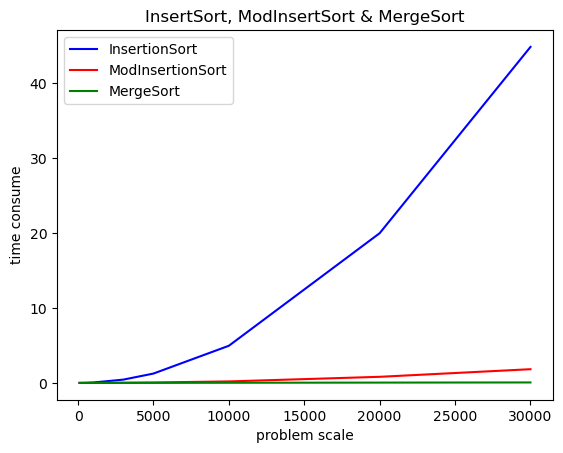

In [25]:
import time #用以记录时间
import matplotlib.pyplot as plt #用以绘图

scales=[100,300,500,1000,3000,5000,10000,20000,30000] #不同的问题规模
time_consumes_of_insertion_sort = [] #插入排序算法在不同问题规模下的时间耗费
time_consumes_of_mod_insertion_sort = [] #改进插入排序算法在不同问题规模下的时间耗费
time_consumes_of_merge_sort = [] #合并排序算法在不同问题规模下的时间耗费
upper_bound = 50000 #元素上界
A = [] #注意：生成的随机数组变量名必须为 A, 其副本可自由命名

# YOUR CODE HERE
for i in range(len(scales)):
    A = generate_random_list(scales[i],upper_bound)
    
    start = time.time()
    insertion_sort(A)
    end = time.time()
    time_consumes_of_insertion_sort.append(end-start)
    
    start = time.time()
    mod_insertion_sort(A)
    end = time.time()
    time_consumes_of_mod_insertion_sort.append(end-start)
    
    start = time.time()
    merge_sort(A,0,len(A)-1)
    end = time.time()
    time_consumes_of_merge_sort.append(end-start)

plt.plot(scales, time_consumes_of_insertion_sort, 'b', label='InsertionSort')
plt.plot(scales, time_consumes_of_mod_insertion_sort, 'r', label='ModInsertionSort')
plt.plot(scales, time_consumes_of_merge_sort, 'g', label='MergeSort')
plt.title('InsertSort, ModInsertSort & MergeSort')
plt.xlabel('problem scale')
plt.ylabel('time consume')
plt.legend()
plt.show()

可获得类似于下面的图像。
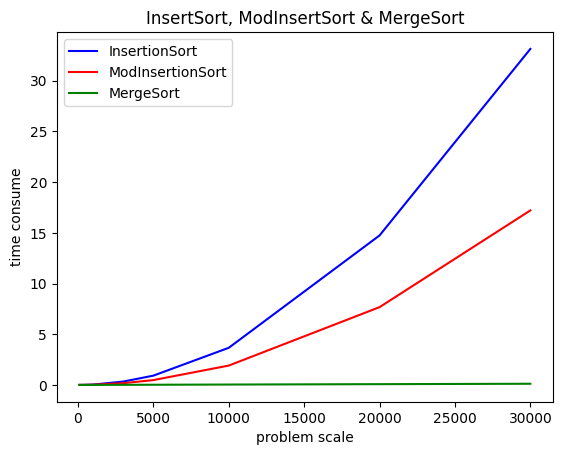

In [ ]:
# 测试以上代码完成情况
assert True != False #该行仅为标记，无需理会
